In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/marketing_data.csv')
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

# Preprocess the data

### 1. Investigate variables like Dt_Customer and Income, etc., and check if they are imported correctly.

In [4]:
# Clean up column names that contain whitespace
df.columns = df.columns.str.strip()
#df.columns = df.columns.str.replace(' ', '')

df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

# Transform income column to a numerical
df['Income'] = df['Income'].str.replace(',','').str.replace('$','').astype('float')
#df['Income'] = df['Income'].str.replace(r'\D', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### 2. Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment.

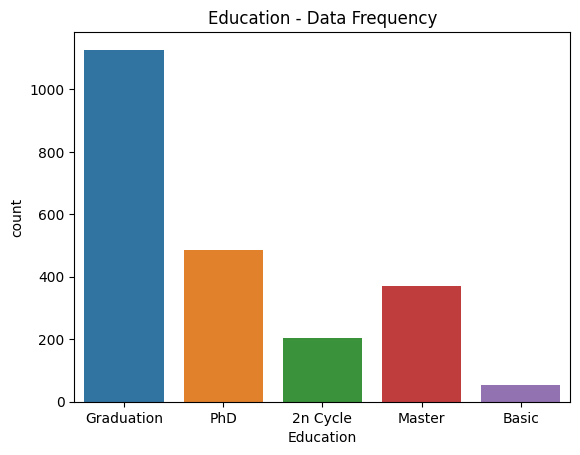

Number of samples According to Education 
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [5]:
# Number of samples according to Education
sns.countplot(x="Education", data=df)
plt.xticks(rotation = 0)
plt.title("Education - Data Frequency")
plt.show()
print(f"Number of samples According to Education \n{df['Education'].value_counts()}")

In terms of education, both '2n cycle' and 'master' refer to the same level of education. This is based off the 
<a url='https://education.ec.europa.eu/education-levels/higher-education/inclusive-and-connected-higher-education/bologna-process'>Three Cycle System</a> from the European Higher Education Area (EHEA). Therefore, we'll merge the two education levels under 'master'. Also, 'graduation' is a little misleading as an education level. We'll assume that it refers to an "undergraduate" education and rephrase it as such.

In [6]:
# Replace '2n cycle' with 'master'
df['Education'] = df['Education'].apply(lambda x: 'Master' if str(x) == '2n Cycle' else str(x))
# Replace 'graduation' with 'undergraduate'
df['Education'] = df['Education'].apply(lambda x: 'Undergraduate' if str(x) == 'Graduation' else str(x))

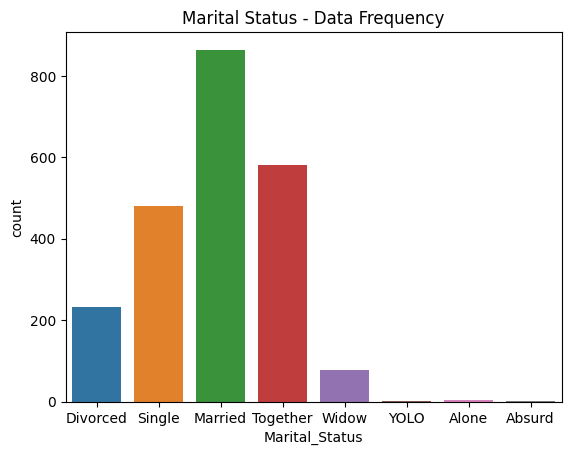

Number of samples According to Marital status 
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64


In [7]:
# Number of samples according to Marital status
sns.countplot(x="Marital_Status", data=df)
plt.xticks(rotation = 0)
plt.title("Marital Status - Data Frequency")
plt.show()
print(f"Number of samples According to Marital status \n{df['Marital_Status'].value_counts()}")

In terms of marital status, 'yolo', 'alone', and 'absurd' can be interpreted and assumed to mean 'single', and as such, these statuses will be merged under 'single'.

In [8]:
# Merge 'yolo', 'absurd', and 'alone' under 'single'
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['Alone', 'YOLO', 'Absurd'] else str(x))

In [9]:
df['Country'].value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

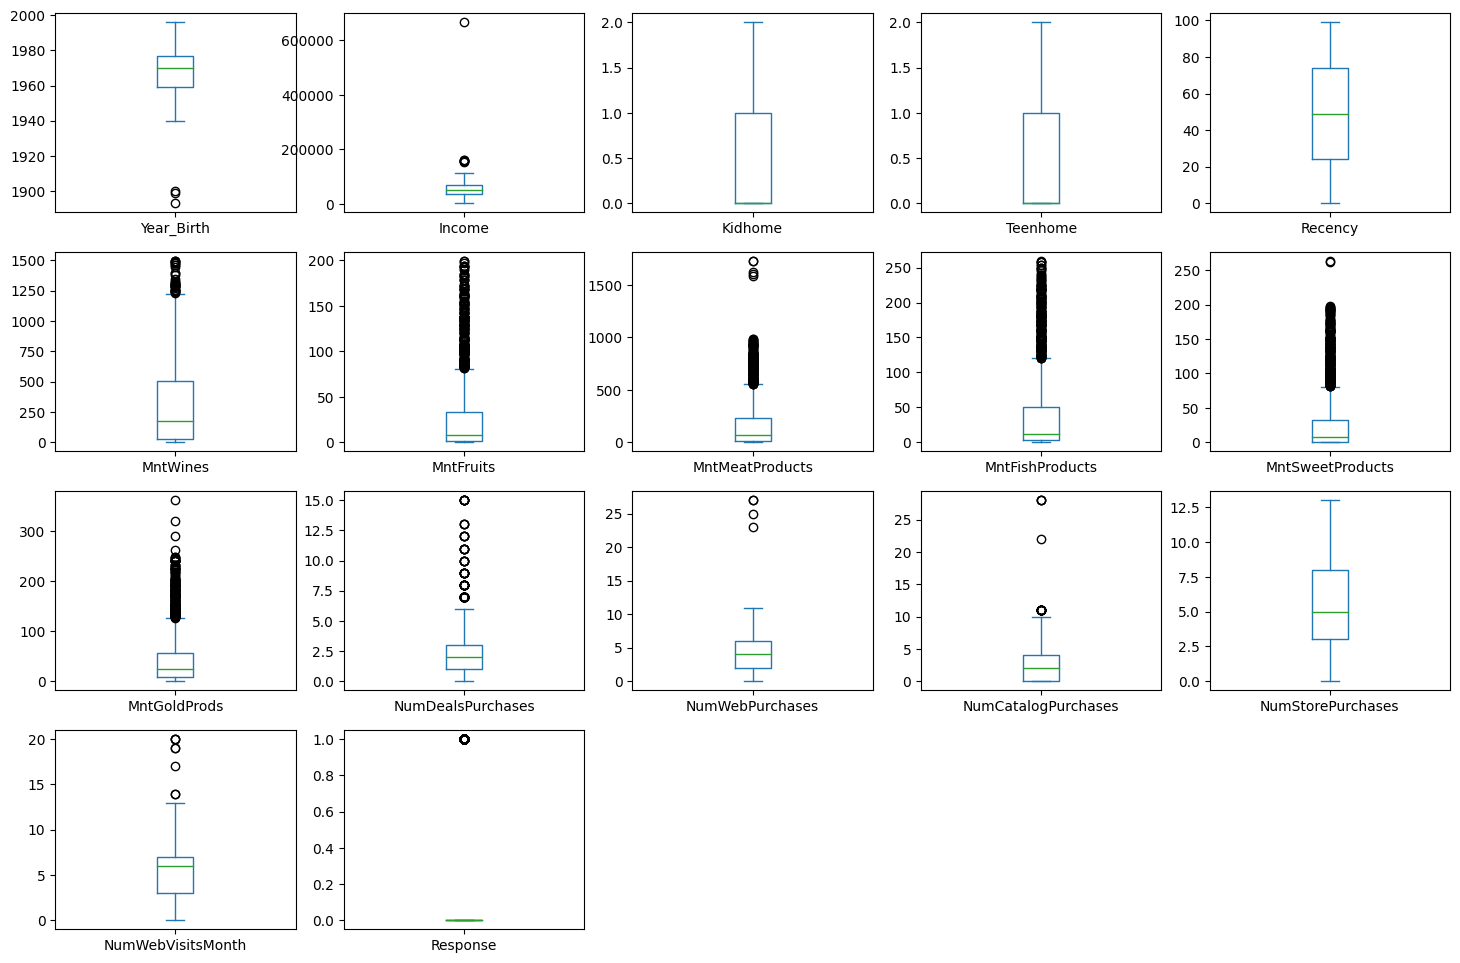

In [11]:
df2 = df.drop(['ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain'],axis=1)
numeric_cols = df2.select_dtypes(include=['number']).columns
df[numeric_cols].plot(subplots=True, layout=(5,5), kind='box', figsize=(18,15))
plt.show()

<Axes: >

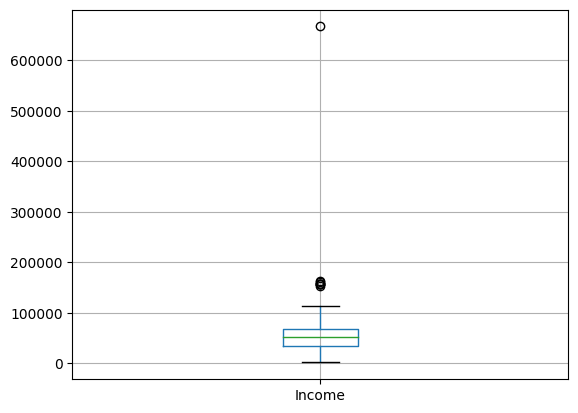

In [12]:
df.boxplot('Income')

<Axes: >

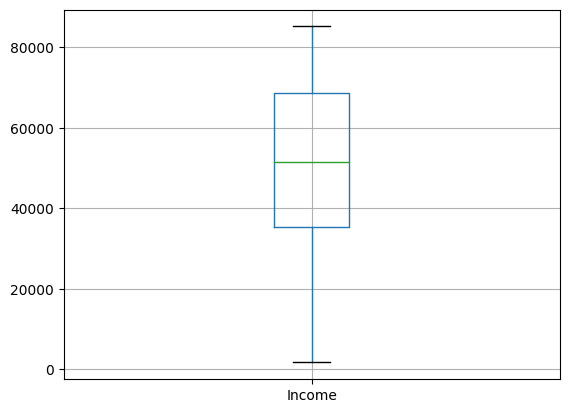

In [13]:
#Removing outliers from income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q1 + 1.5*IQR
df['Income'].mask(df['Income'] > UB, UB, inplace=True)
df.boxplot('Income')

# df = df.drop(df[df['Year_Birth'] <= 1900].index)
# df = df.drop(df[df['Income'] > 600000].index)

<Axes: >

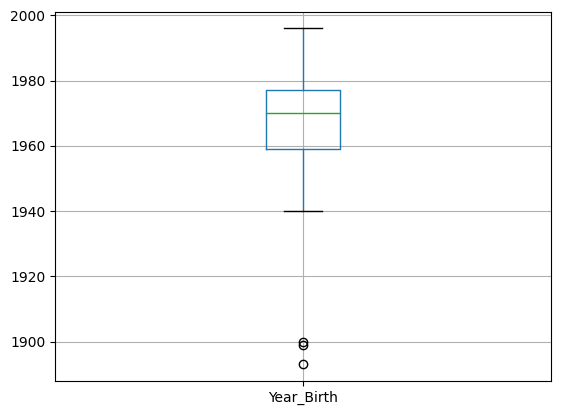

In [14]:
df.boxplot('Year_Birth')

<Axes: >

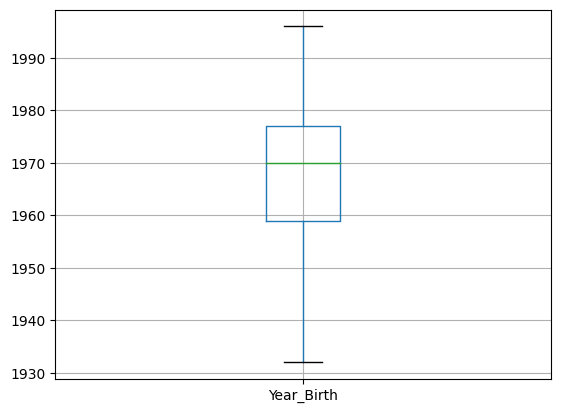

In [15]:
#Removing outliers from year of birth
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q1 + 1.5*IQR
df['Year_Birth'].mask(df['Year_Birth'] < LB, LB, inplace=True)
df.boxplot('Year_Birth')

<Axes: xlabel='Income', ylabel='Density'>

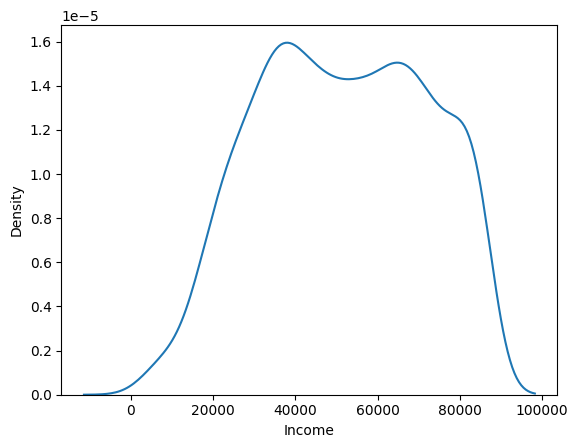

In [16]:
# Distribution of Income
sns.kdeplot(data=df, x="Income")

### 3. Income values for a few customers are missing. Perform missing value imputation. 
<br> Assume that the customers with similar education and marital status make the same yearly income, on average. You may have to clean the data before performing this. For data cleaning, look into the categories of education and marital status. 

In [17]:
# check the null data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [18]:
# pivot table for see maritalstatus according to education
df1 = df[["Education", 'Marital_Status']].value_counts().groupby(["Education", "Marital_Status"]).sum().reset_index().sort_values(by=['Education','Marital_Status'], ascending=False)
df1 = (df1.pivot(index='Education', columns='Marital_Status', values=0))
df1

Marital_Status,Divorced,Married,Single,Together,Widow
Education,,,,,
Basic,1,20,18,14,1
Master,60,219,114,163,17
PhD,52,192,101,117,24
Undergraduate,119,433,254,286,35


In [19]:
#Replacing Missing values based on median income
#from sklearn.compose import ColumnTransformer
#from sklearn.impute import SimpleImputer
#transformer = ColumnTransformer(transformers = [('simple_imputer', SimpleImputer(strategy = 'median'), ['Income'])], remainder = 'passthrough')

In [20]:
#Replacing Missing values based on Education and Marital Status
unique_Education = pd.unique(df.Education)
unique_MStatus=pd.unique(df.Marital_Status)
temp_data = df.copy()  # set temp_data variable to avoid losing real data

all_data_mean = np.round(np.mean(temp_data['Income']), 2)

for q in unique_Education:
    for m in unique_MStatus:
        filter = (temp_data.Education == q) & ( temp_data.Marital_Status == m)
        filtered_data = temp_data[filter]
        
        mean = np.round(np.mean(filtered_data['Income']), 2)
        
        if ~np.isnan(mean): 
            filtered_data['Income'] = filtered_data['Income'].fillna(mean)
            print(f"Missing Value in 'Income' column filled with {mean} when Education:{q} and Marital Status: {m}")
        else: 
            filtered_data['Income'] = filtered_data['Income'].fillna(all_data_mean)
            print(f"Missing Value in 'Income' column filled with {all_data_mean} when Education:{q} and Marital Status: {m}")
        
        temp_data[filter] = filtered_data
    
df = temp_data.copy() 

Missing Value in 'Income' column filled with 53757.41 when Education:Undergraduate and Marital Status: Divorced
Missing Value in 'Income' column filled with 51003.34 when Education:Undergraduate and Marital Status: Single
Missing Value in 'Income' column filled with 50640.89 when Education:Undergraduate and Marital Status: Married
Missing Value in 'Income' column filled with 53194.21 when Education:Undergraduate and Marital Status: Together
Missing Value in 'Income' column filled with 54962.7 when Education:Undergraduate and Marital Status: Widow
Missing Value in 'Income' column filled with 52932.54 when Education:PhD and Marital Status: Divorced
Missing Value in 'Income' column filled with 52535.13 when Education:PhD and Marital Status: Single
Missing Value in 'Income' column filled with 56819.74 when Education:PhD and Marital Status: Married
Missing Value in 'Income' column filled with 55168.3 when Education:PhD and Marital Status: Together
Missing Value in 'Income' column filled wit

In [21]:
# check the null data
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

### 4. Create variables to populate the total number of children, age, and total spending. 
Hint: From the number of purchases through the three channels, people can derive the total purchases.

In [22]:
import datetime
# Age from birthyear
df['Age'] = datetime.datetime.now().year - df['Year_Birth']
# Total number of dependents in the household
df['Children_Count'] = df['Kidhome'] + df['Teenhome']
# Total spending
df['TotalSpending'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

### 5. Use ordinal encoding and one hot encoding according to different types of categorical variables.

In [23]:
df = df.drop(['ID', 'Year_Birth','Kidhome','Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'],axis=1)

In [24]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Country', 'Age', 'Children_Count',
       'TotalSpending'],
      dtype='object')

In [25]:
df.Education.unique().tolist()

['Undergraduate', 'PhD', 'Master', 'Basic']

In [26]:
# Ordinal encoding for 'Education'
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

data = pd.DataFrame({"Levels":df.Education.unique().tolist()})
encoder = OrdinalEncoder(categories=[df.Education.unique().tolist()])
df['Education1']=encoder.fit_transform(df[['Education']])
print(encoder.categories_)

# for categorical variables use OneHotEncoder
df = pd.get_dummies(df, columns=[ "Marital_Status"])
df.head(3)

[array(['Undergraduate', 'PhD', 'Master', 'Basic'], dtype=object)]


,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Country,Age,Children_Count,TotalSpending,Education1,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,Undergraduate,84835.0,2014-06-16,0,189,104,379,111,189,218,...,SP,53,0,1190,0.0,1,0,0,0,0
1,Undergraduate,57091.0,2014-06-15,0,464,5,64,7,0,37,...,CA,62,0,577,0.0,0,0,1,0,0
2,Undergraduate,67267.0,2014-05-13,0,134,11,59,15,2,30,...,US,65,1,251,0.0,0,1,0,0,0


### 6. Create a heatmap to showcase the correlation between different pairs of variables.

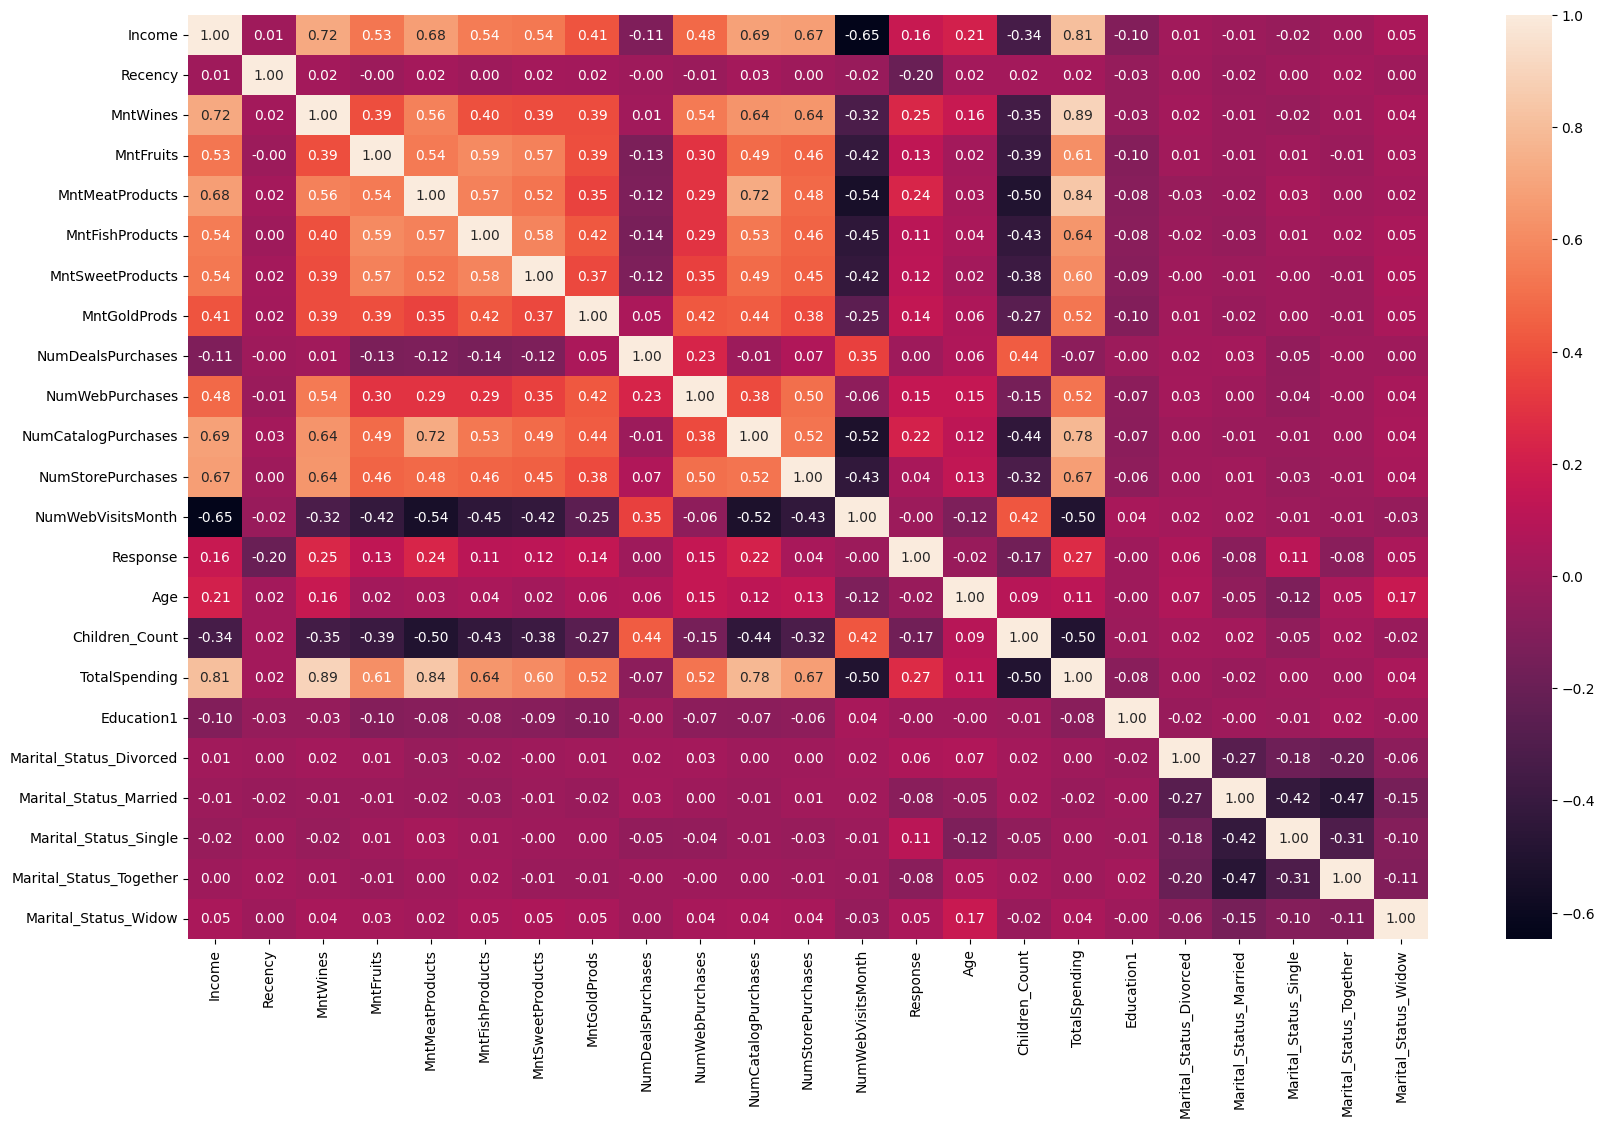

In [27]:
# lets check the correlation between variables through heatmap
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True,fmt='.2f')
plt.show()

In [28]:
# lets check the highest correlation 
df.corr()['Response'].sort_values(ascending=False)

Response                   1.000000
TotalSpending              0.265298
MntWines                   0.247254
MntMeatProducts            0.236335
NumCatalogPurchases        0.220810
Income                     0.161657
NumWebPurchases            0.148730
MntGoldProds               0.139850
MntFruits                  0.125289
MntSweetProducts           0.117372
MntFishProducts            0.111331
Marital_Status_Single      0.110555
Marital_Status_Divorced    0.055147
Marital_Status_Widow       0.051723
NumStorePurchases          0.039363
NumDealsPurchases          0.002238
Education1                -0.003467
NumWebVisitsMonth         -0.003987
Age                       -0.020058
Marital_Status_Together   -0.075770
Marital_Status_Married    -0.079378
Children_Count            -0.169163
Recency                   -0.198437
Name: Response, dtype: float64

## Examine collinearity

Including features that are highly correlated with each other, or are multicollinear, adds noise and inaccuracy, so we need to try and reduce this.

Creating a correlation heatmap is a good way to visualise potential collinearity. The rule of thumb is that if correlation is greater than 0.8 between two independent variables, then multicollinearity would exist.

In [29]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


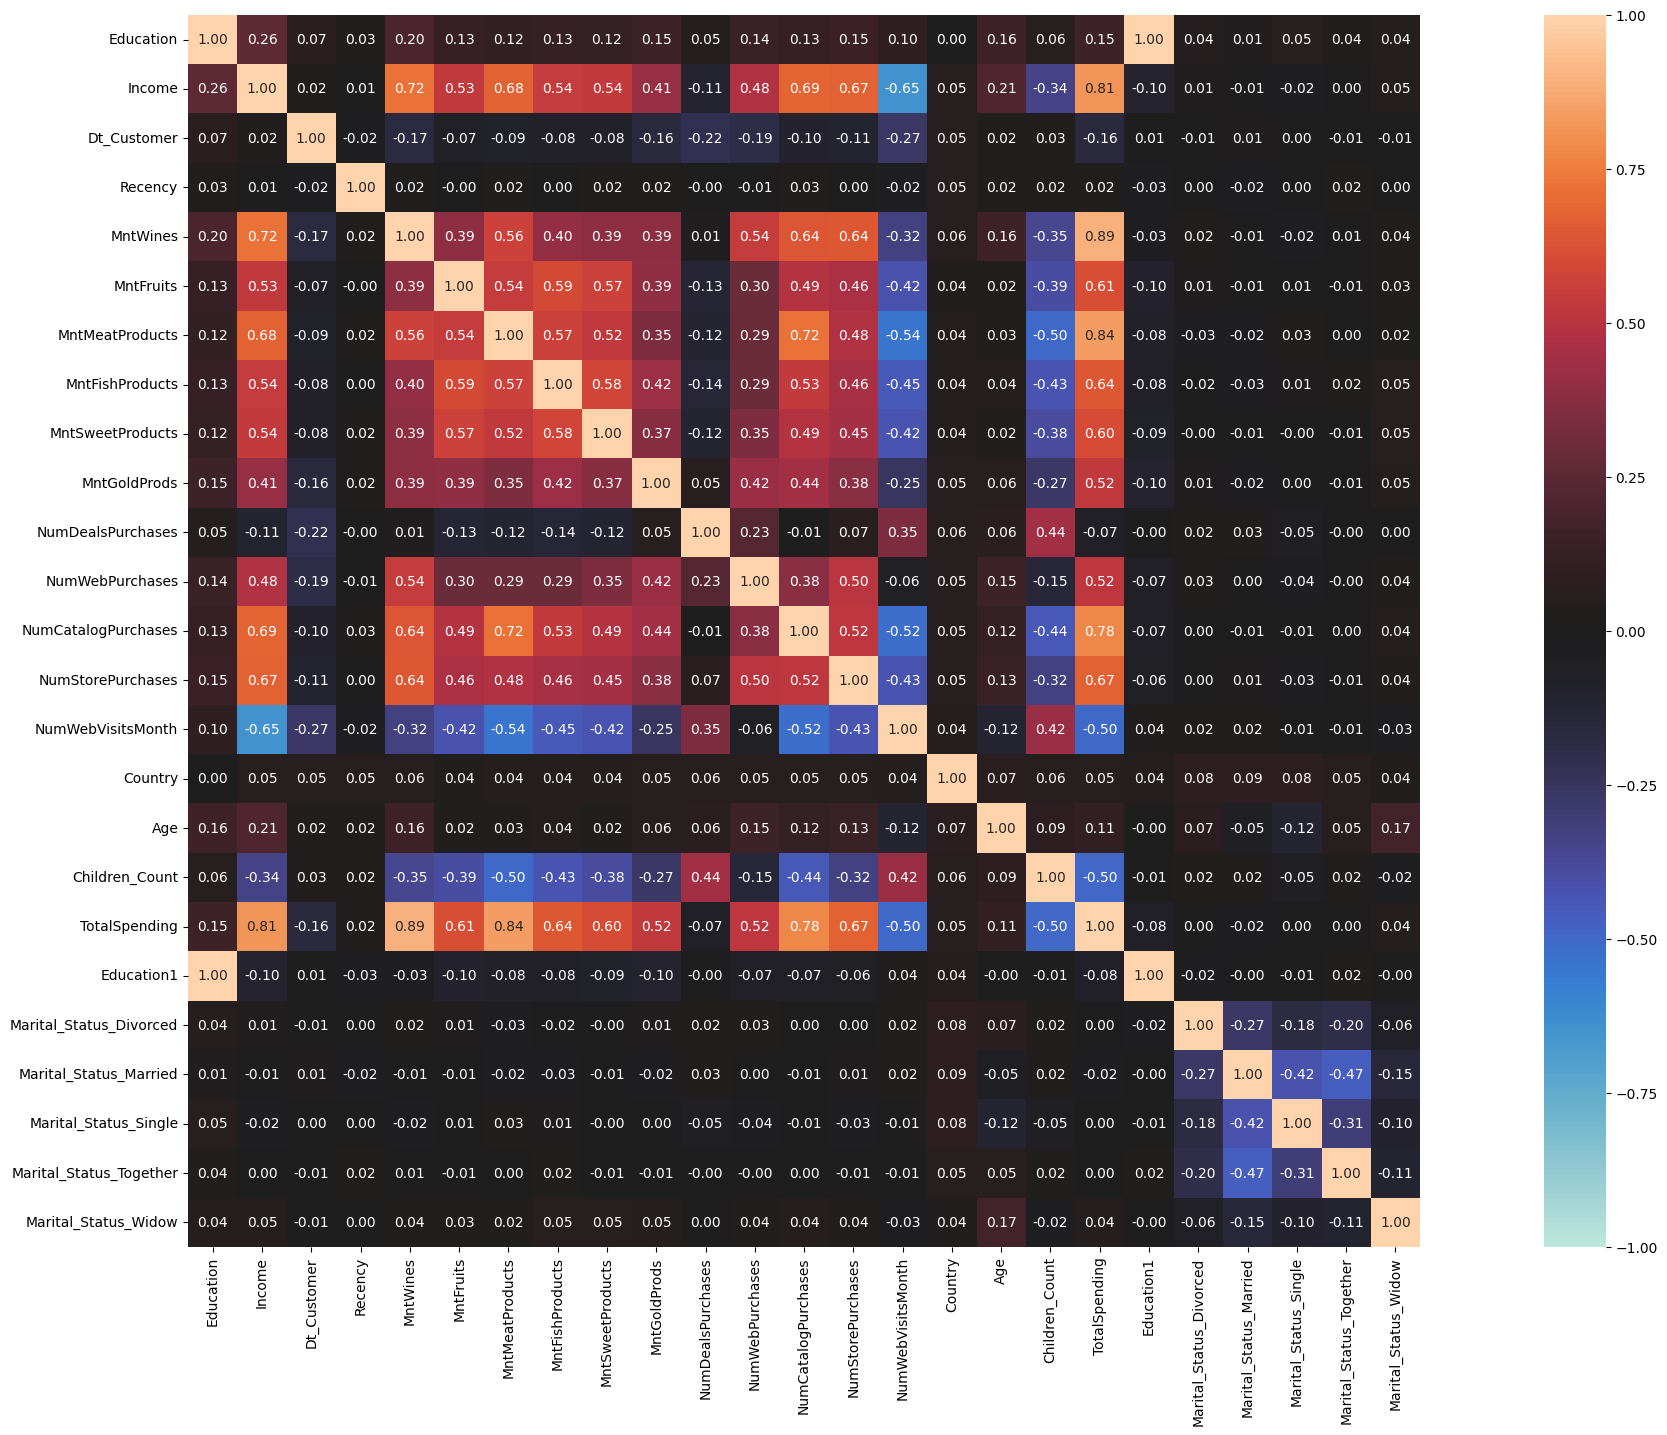

In [30]:
X = df.drop('Response', axis = 1)
from dython.nominal import associations
complete_correlation = associations(X, figsize = (32, 16))

No multicollinearity among the independent variables.

### 7. Test the following hypotheses:

#### 1. Older people are not as tech-savvy and probably prefer shopping in-store.

In [31]:
df_age=df[['Age','NumWebPurchases','NumStorePurchases']]


df_age.loc[(df_age['Age'] <= 25) , 'Age_Group'] = 'Young'
df_age.loc[(df_age['Age']  > 50) , 'Age_Group'] = 'Elderly'
df_age.loc[(df_age['Age']  > 25) & (df_age['Age'] <= 50) , 'Age_Group'] = 'Middle Age'


df_age.head()

,Age,NumWebPurchases,NumStorePurchases,Age_Group
0,53,4,6,Elderly
1,62,7,7,Elderly
2,65,3,5,Elderly
3,56,1,2,Elderly
4,34,3,2,Middle Age


In [32]:
df_age_plot=df_age[["Age_Group", 'NumWebPurchases','NumStorePurchases']].groupby(["Age_Group"]).sum() # Age_Group as an index for plotting .reset_index() 
df_age_plot.head()

,NumWebPurchases,NumStorePurchases
Age_Group,,
Elderly,5795,8075
Middle Age,3355,4895


<Axes: xlabel='Age_Group'>

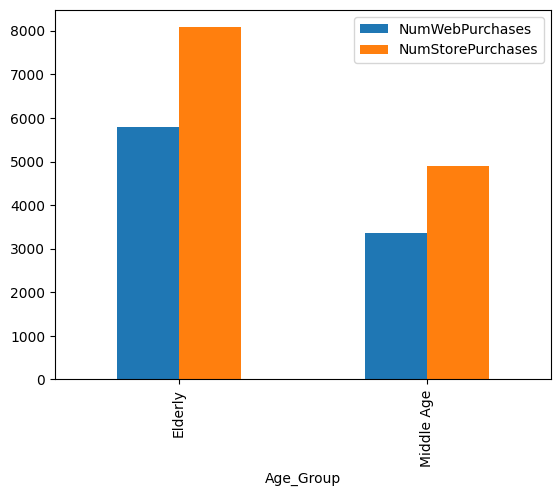

In [33]:
df_age_plot.plot.bar()

Older people have more instore purchases than online purchases

#### 2. Customers with kids probably have less time to visit a store and would prefer to shop online.

In [34]:
df_kids=df[['Children_Count','NumWebPurchases','NumStorePurchases']]
df_kids_plot= df_kids.groupby(["Children_Count"]).sum() #.reset_index() 
df_kids_plot.head()

,NumWebPurchases,NumStorePurchases
Children_Count,,
0,2803,4635
1,4834,6310
2,1361,1815
3,152,210


<Axes: xlabel='Children_Count'>

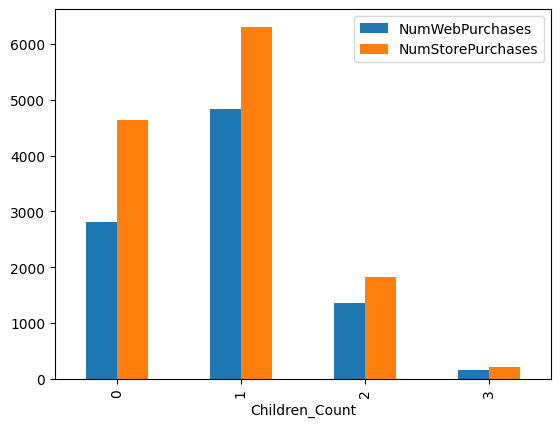

In [35]:
df_kids_plot.plot.bar()

Parents with 2 or more children seem spending very less in shopping.
These categories of parents prefer shopping instore however increasing trend is noticed on online purchases among these parents. 

#### 3. Other distribution channels may cannibalize sales at the store.


([<matplotlib.patches.Wedge at 0x14fa4ece0>,
 [Text(0.9698058573993448, 0.5191113550616302, 'Deals'),
  Text(-0.29933747437362795, 1.0584881087832863, 'Online'),
  Text(-1.090577484984908, -0.14366888752960116, 'Catalog'),
  Text(0.3739290163314566, -1.0344936397800566, 'Instore')])

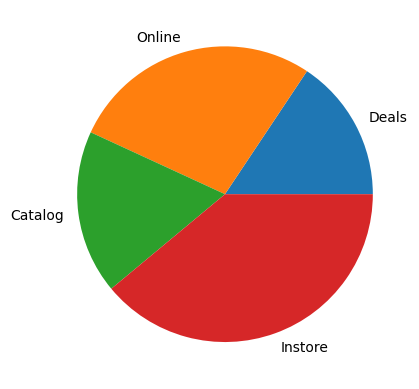

In [36]:
labels = ['Deals','Online','Catalog','Instore']
sizes = [df.NumDealsPurchases.sum(),
         df.NumWebPurchases.sum(),
         df.NumCatalogPurchases.sum(),
         df.NumStorePurchases.sum()]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

The sales are highest at the Store than any other distribution channel. However all the distribution channels combinely have more sales than at the Store

In [37]:
df.columns

Index(['Education', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Country', 'Age', 'Children_Count', 'TotalSpending',
       'Education1', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

#### 4. Does the US fare significantly better than the rest of the world in terms of total purchases?

In [38]:
totalpurchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Country']]
totalpurchases.head(1)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Country
0,1,4,4,6,SP


In [39]:
# Calculate the total number of purchases made through different channels
totalpurchases['TotalPurchases'] = totalpurchases['NumDealsPurchases'] + totalpurchases['NumWebPurchases'] + totalpurchases['NumCatalogPurchases'] + totalpurchases['NumStorePurchases']
totalpurchases.head(1)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Country,TotalPurchases
0,1,4,4,6,SP,15


In [40]:
average_purchases_per_country = totalpurchases.groupby('Country').agg(Total_Purchases = ('TotalPurchases', 'sum'))
average_purchases_per_country.head(1)

,Total_Purchases
Country,
AUS,2314


In [41]:
average_purchases_per_country['Total_Customers'] = totalpurchases['Country'].value_counts()
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers
Country,,
AUS,2314,160


In [42]:
average_purchases_per_country['Purchases_Per_Customer'] = np.floor(average_purchases_per_country['Total_Purchases'] / average_purchases_per_country['Total_Customers'])
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers,Purchases_Per_Customer
Country,,,
AUS,2314,160,14.0


In [43]:
average_purchases_per_country.assign(country = average_purchases_per_country.index.get_level_values('Country'))
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers,Purchases_Per_Customer
Country,,,
AUS,2314,160,14.0


In [44]:
average_purchases_per_country.reset_index(inplace = True)
average_purchases_per_country.head(1)

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
0,AUS,2314,160,14.0


In [45]:
average_purchases_per_country = average_purchases_per_country.sort_values(by = 'Total_Purchases', ascending = False)
average_purchases_per_country.head(1)

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
6,SP,16052,1095,14.0


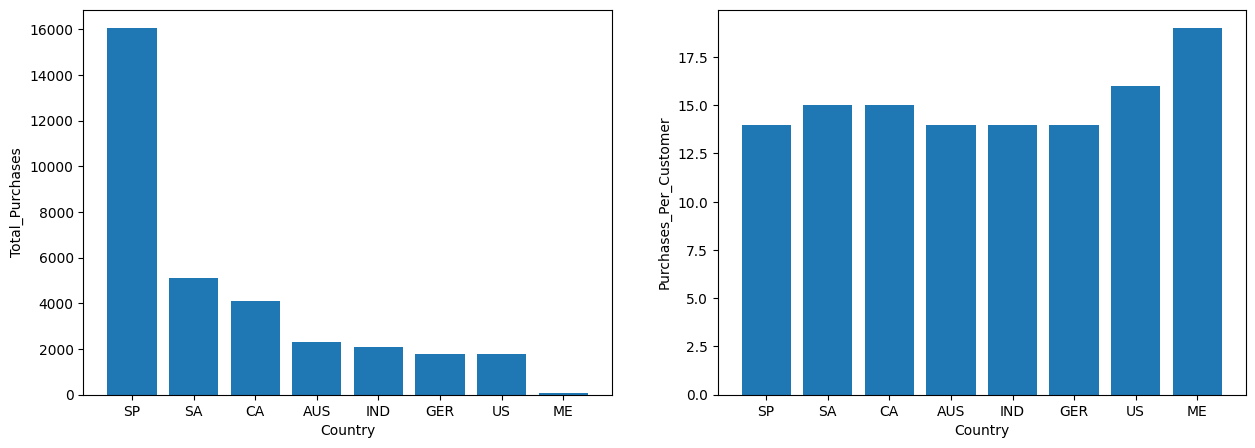

In [46]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(x = average_purchases_per_country['Country'], 
        height = average_purchases_per_country['Total_Purchases'])
ax1.set_xlabel('Country', fontsize=10)
ax1.set_ylabel('Total_Purchases', fontsize='medium') 

ax2.bar(x = average_purchases_per_country['Country'],
       height = average_purchases_per_country['Purchases_Per_Customer'])
ax2.set_xlabel('Country', fontsize=10)
ax2.set_ylabel('Purchases_Per_Customer', fontsize='medium') 

plt.show()

In terms of total number of purchases, USA doesn't seem to be in a good position. In fact it is the lowest (excluding ME due to only 3 records). However if we look at the purchases made per person in a country, then USA tops the chart.